<a href="https://colab.research.google.com/github/khailcon/Huehueteotl/blob/Alec_Code/Ceramic_Project_CHEM599.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Huehueteotl Ceramic Analysis Project

** https://github.com/khailcon/Huehueteotl **

##Tasks to accomplish
* Edge Detection of ceramics
* Void Detection via inverting color scheme
* Shape Detection
* Automation or For looping for a folder of images
* Share an online folder for raw data that we can access using code
* Make a yml

 

SyntaxError: invalid syntax (<ipython-input-183-13cb459d9a3b>, line 1)

In [151]:
#import all necessary packages
import matplotlib.pyplot as plt
from math import sqrt
import skimage as sk
from skimage.color import rgb2gray
from skimage.feature import blob_dog, blob_log, blob_doh, canny
from skimage.filters import rank
from skimage.morphology import disk, square, binary_dilation, binary_erosion
from skimage.segmentation import watershed
from skimage.util import img_as_float, img_as_ubyte, invert
from skimage.measure import label, regionprops, regionprops_table
from skimage.filters import threshold_otsu, sobel
from scipy.ndimage import binary_fill_holes
from skimage.morphology import remove_small_objects
# turn on if using colab
# from google.colab import drive
from pathlib import Path
import colorthief
import pandas as pd
import numpy as np
from time import sleep
from tqdm import tqdm



In [152]:
#from google.colab import drive
#drive.mount('/content/drive')

In [153]:

def inclusion_counter(image, blob_algorithm = 'doh', max_sigma = 30, threshold = 0.1):
    image_gray = rgb2gray(image)
    if blob_algorithm == 'doh':
        blobs = blob_doh(image_gray, max_sigma = max_sigma, threshold = threshold)
        inclusions = len(blobs)
    elif blob_algorithm == 'dog':
        blobs = blob_dog(image_gray, max_sigma = max_sigma, threshold = threshold)
        blobs[:,2] = blobs[:, 2] * sqrt(2)
        inclusions = len(blobs)
    elif blob_algorithm == 'log':
        blobs = blob_log(image_gray, max_sigma = max_sigma, num_sigma = 10, threshold = threshold)
        blobs[:,2] = blobs[:, 2] * sqrt(2)
        inclusions = len(blobs)
    elif blob_algorithm == 'all':
        blobs_doh = blob_doh(image_gray, max_sigma = max_sigma, threshold = .1*threshold)
        blobs_dog = blob_dog(image_gray, max_sigma = max_sigma, threshold = threshold)
        blobs_dog[:,2] = blobs_dog[:, 2] * sqrt(2)
        blobs_log = blob_log(image_gray, max_sigma = max_sigma, num_sigma = 10, threshold = threshold)
        blobs_log[:,2] = blobs_log[:, 2] * sqrt(2)
        inclusions = ((len(blobs_doh)+len(blobs_dog)+len(blobs_log))/3)
    return inclusions

    """This function returns a rough count of the number of inclusions based on various algorithms for a folder of ceramic scans

  Parameters
  -----------
  folder_path : the path of a local folder with images ending in _int.jpeg starting from 1 to n
  blob_algorithm : str, optional
    Default: 'doh'. ('dog': Difference of Gaussian, 'log': Laplacian of Gaussian, 'doh': Determinant of Hessian, 'all': Average of all three)
    note- if 'all', threshold for doh will be one magnitude smaller
  max_sigma : float, optional
    Keep this high to detect large blobs
  threshold : float, optional
    Reduce this to detect less prominent blobs

  Returns
  --------
  DataFrame
    Summary statistics for each ceramic's inclusions
  """



In [186]:

def inclusion_counter2(folder_path, blob_algorithm = 'doh', max_sigma = 50, threshold = 0.4):
    threshold_doh = threshold/40
    pathlist = Path(folder_path).rglob('*.jpeg')
    path_strs = []
    for path in pathlist:
     # because path is object not string
        path_in_str = str(path)
        path_strs.append(path_in_str)

    #image operations
    maxrad = []
    meanrad = []
    minrad = []
    inclusions = []
    names = []
    area = []
    data = pd.DataFrame()

    if blob_algorithm == 'doh':
        for path in path_strs:
            name = path
            names.append(name.rsplit(sep = '/')[-1]) #need to get a column in there with names from each ceramic might need to be part of top chunk
            im = plt.imread(name)
            image_gray = rgb2gray(im)
            blobs_doh = blob_doh(image_gray, max_sigma = max_sigma, threshold = threshold_doh)
            inclusions.append(len(blobs_doh))
            maxrad.append(blobs_doh[:,2].max())
            meanrad.append(blobs_doh[:,2].mean())
            minrad.append(blobs_doh[:,2].min())
            imcan = canny(rgb2gray(im))
            sherd_bi = binary_fill_holes(binary_erosion(binary_dilation(imcan, disk(10)), disk(10)))
            sherd_bi = remove_small_objects(sherd_bi, 200)
            object_labels = label((sherd_bi))
            regions = regionprops_table(object_labels, properties = ['area'])
            tempdf = pd.DataFrame(regions)
            area.append(tempdf.iloc[0][0])
            
            
    elif blob_algorithm == 'dog':
        for path in path_strs:
            name = path
            names.append(name.rsplit(sep = '/')[-1]) #need to get a column in there with names from each ceramic might need to be part of top chunk
            im = plt.imread(name)
            image_gray = rgb2gray(im)
            blobs_dog = blob_dog(image_gray, max_sigma = max_sigma, threshold = threshold)
            inclusions.append(len(blobs_dog))
            maxrad.append(blobs_dog[:,2].max())
            meanrad.append(blobs_dog[:,2].mean())
            minrad.append(blobs_dog[:,2].min())
            imcan = canny(rgb2gray(im))
            sherd_bi = binary_fill_holes(binary_erosion(binary_dilation(imcan, disk(10)), disk(10)))
            sherd_bi = remove_small_objects(sherd_bi, 200)
            object_labels = label((sherd_bi))
            regions = regionprops_table(object_labels, properties = ['area'])
            tempdf = pd.DataFrame(regions)
            area.append(tempdf.iloc[0][0])
            

    elif blob_algorithm == 'log':
        for path in path_strs:
            name = path
            names.append(name.rsplit(sep = '/')[-1]) #need to get a column in there with names from each ceramic might need to be part of top chunk
            im = plt.imread(name)
            image_gray = rgb2gray(im)
            blobs_log = blob_log(image_gray, max_sigma = max_sigma, num_sigma = 10, threshold = threshold)
            blobs_log[:,2] = blobs_log[:, 2] * sqrt(2)
            inclusions.append(len(blobs_log))
            maxrad.append(blobs_log[:,2].max())
            meanrad.append(blobs_log[:,2].mean())
            minrad.append(blobs_log[:,2].min())
            imcan = canny(rgb2gray(im))
            sherd_bi = binary_fill_holes(binary_erosion(binary_dilation(imcan, disk(10)), disk(10)))
            sherd_bi = remove_small_objects(sherd_bi, 200)
            object_labels = label((sherd_bi))
            regions = regionprops_table(object_labels, properties = ['area'])
            tempdf = pd.DataFrame(regions)
            area.append(tempdf.iloc[0][0])
           
        
 
    elif blob_algorithm == 'all':
        for path in path_strs:
            name = path
            names.append(name) #need to get a column in there with names from each ceramic might need to be part of top chunk
            im = plt.imread(name)
            image_gray = rgb2gray(im)
            blobs_doh = blob_doh(image_gray, max_sigma = max_sigma, threshold = threshold_doh)
            blobs_dog = blob_dog(image_gray, max_sigma = max_sigma, threshold = threshold)
            blobs_dog[:,2] = blobs_dog[:, 2] * sqrt(2)
            blobs_log = blob_log(image_gray, max_sigma = max_sigma, num_sigma = 10, threshold = threshold)
            blobs_log[:,2] = blobs_log[:, 2] * sqrt(2)
            inclusions.append(((len(blobs_doh)+len(blobs_dog)+len(blobs_log))/3))
            imcan = canny(rgb2gray(im))
            sherd_bi = binary_fill_holes(binary_erosion(binary_dilation(imcan, disk(10)), disk(10)))
            sherd_bi = remove_small_objects(sherd_bi, 200)
            object_labels = label((sherd_bi))
            regions = regionprops_table(object_labels, properties = ['area'])
            tempdf = pd.DataFrame(regions)
            area.append(tempdf.iloc[0][0])
            
    
    
    data['Name']= names        
    data['Maximum Inclusion Radius'] = maxrad
    data['Average Inclusion Radius'] = meanrad
    data['Minimum Inclusion Radius'] = minrad
    data['Estimated Total Inclusions']= inclusions
    data['Sherd Area'] = area
    data['Inclusions/ Sherd Area']= data['Estimated Total Inclusions']/data['Sherd Area']
    

    return data

In [155]:
folder_path = '/Users/aiacobucci922/Documents/CHEM_599/Raw_Images/'
pathlist = Path(folder_path).rglob('*.jpeg')
images= []
for path in pathlist:
    image = plt.imread(str(path))
    images.append(image)


In [ ]:
doh = inclusion_counter2(folder_path)
dog = inclusion_counter2(folder_path, blob_algorithm = 'dog')
log = inclusion_counter2(folder_path, blob_algorithm = 'log')
all3 = inclusion_counter2(folder_path, blob_algorithm = 'all') 

In [ ]:
doh

In [ ]:
dog

In [ ]:
log

In [ ]:
all3

In [157]:
images[0]

array([[[ 63,  63,  65],
        [ 63,  63,  65],
        [ 63,  63,  65],
        ...,
        [ 58,  58,  60],
        [ 59,  59,  59],
        [ 59,  61,  60]],

       [[ 64,  64,  66],
        [ 64,  64,  66],
        [ 64,  64,  66],
        ...,
        [ 58,  58,  60],
        [ 59,  59,  59],
        [ 59,  61,  60]],

       [[ 64,  64,  66],
        [ 64,  64,  66],
        [ 64,  64,  66],
        ...,
        [ 58,  58,  60],
        [ 59,  59,  59],
        [ 60,  60,  60]],

       ...,

       [[ 42,  79,  38],
        [ 42,  79,  38],
        [ 41,  78,  37],
        ...,
        [ 39,  71,  30],
        [ 39,  71,  30],
        [ 39,  71,  30]],

       [[ 41,  80,  36],
        [ 41,  80,  36],
        [ 41,  80,  36],
        ...,
        [ 35,  73,  26],
        [ 35,  73,  26],
        [ 36,  74,  27]],

       [[110,  26, 122],
        [109,  25, 121],
        [109,  25, 121],
        ...,
        [104,  20, 114],
        [104,  20, 114],
        [104,  20, 114]]

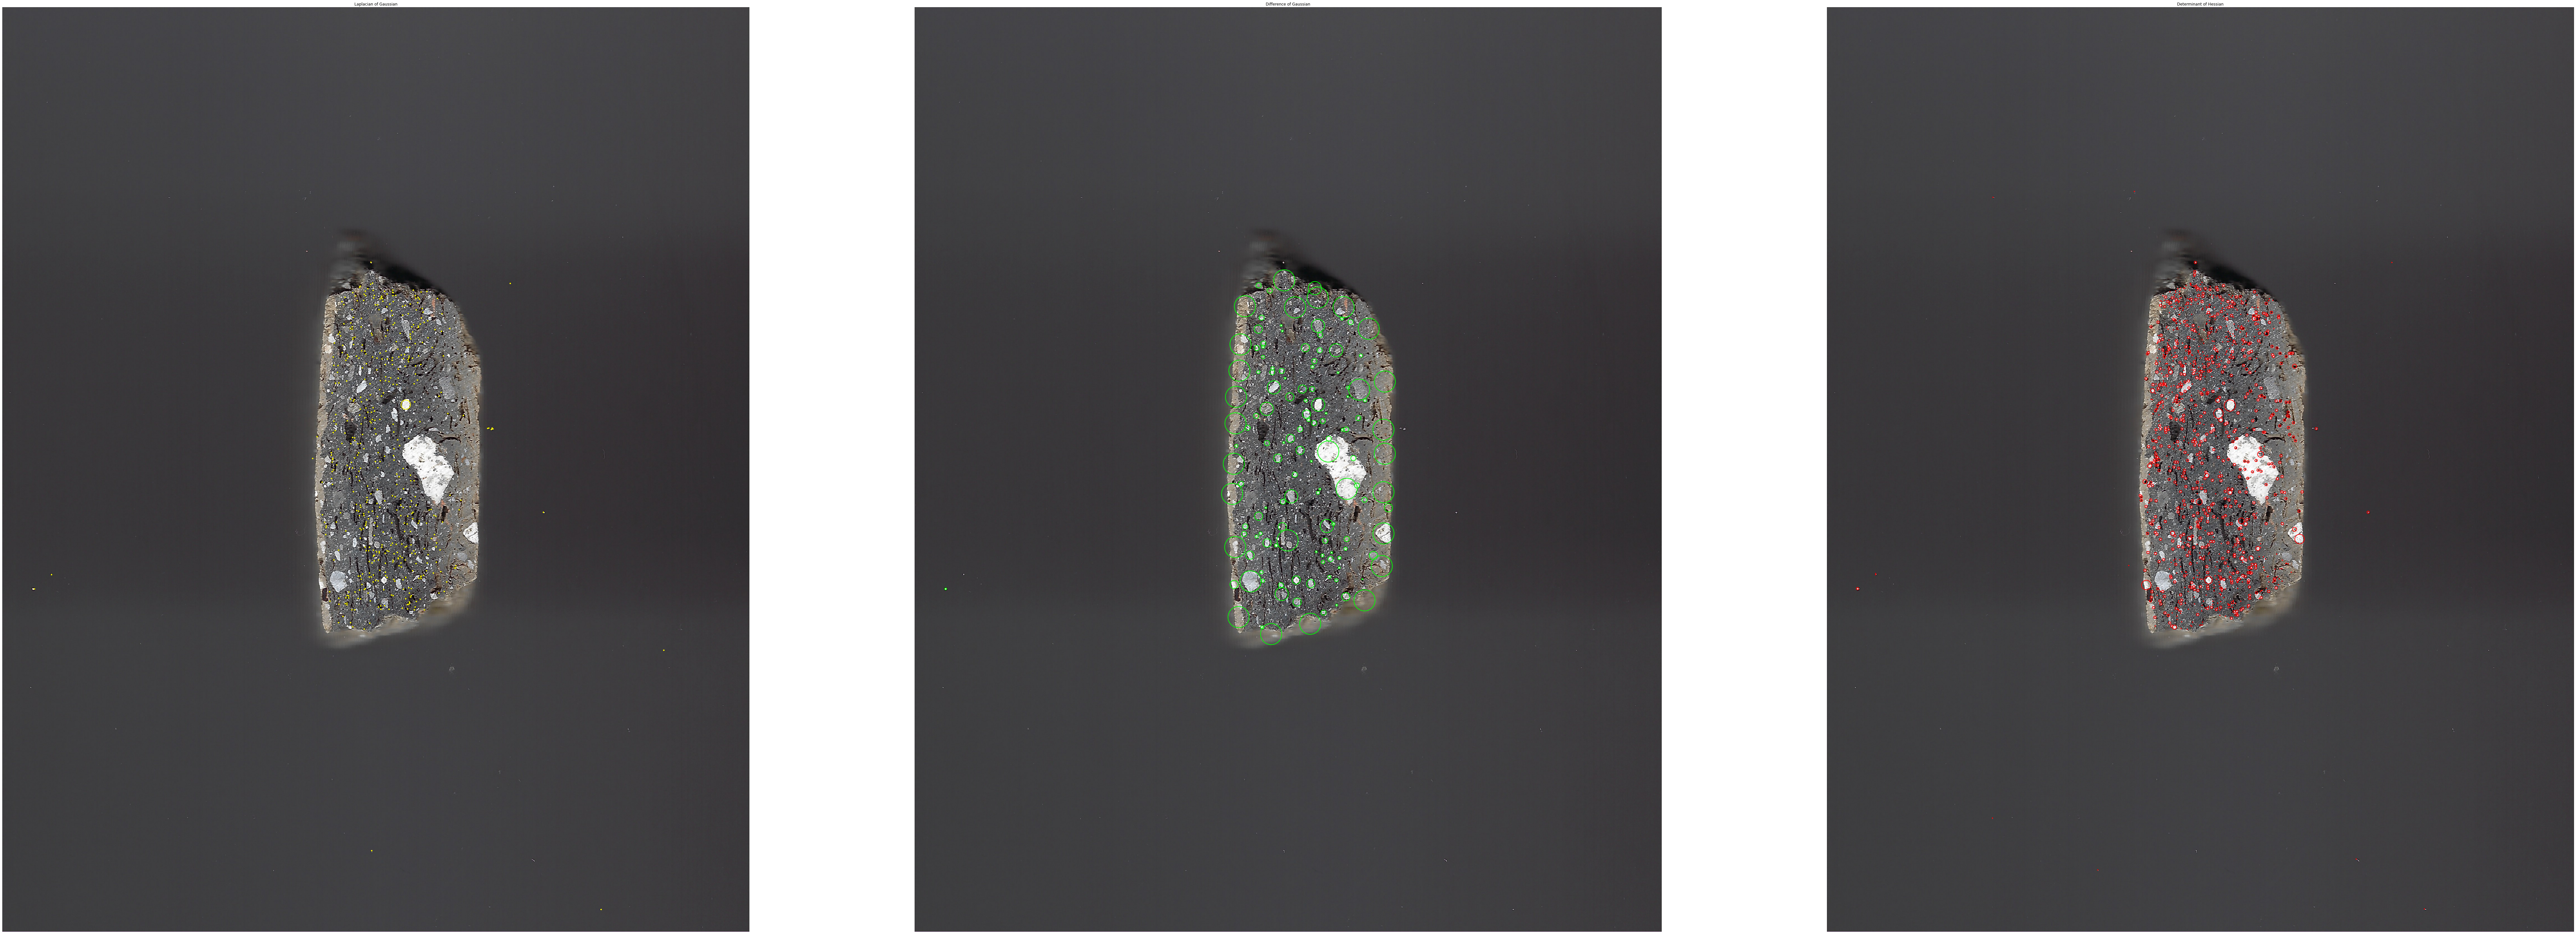

In [158]:
impath_google = '/content/drive/MyDrive/Ceramics_Images/Ceramic_13.jpeg'
impath_local = '/Users/aiacobucci922/Documents/CHEM_599/Raw_Images/Ceramic_1.jpeg'
image = plt.imread(impath_local)
image_gray = rgb2gray(image)

blobs_log = blob_log(image_gray, max_sigma=50, num_sigma=10, threshold=.4)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.4)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.01)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(120, 40), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image)
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()

#fig.savefig('lowered_sensitivity_large.jpg')

In [159]:
testlist = []
testlist.append(blobs_doh[:,2].max())

In [160]:
testlist

[20.333333333333336]

In [161]:
folder_path = '/Users/aiacobucci922/Documents/CHEM_599/Raw_Images/'
pathlist = Path(folder_path).rglob('*.jpeg')
path_strs = []
for path in pathlist:
     # because path is object not string
    path_in_str = str(path)
    path_strs.append(path_in_str)
path_strs[3]

'/Users/aiacobucci922/Documents/CHEM_599/Raw_Images/Ceramic_1.jpeg'

In [162]:
fakepath = '/Users/aiacobucci922/Documents/CHEM_599/Raw_Images/Ceramic_1.jpeg' 
fakepath2 = fakepath.rsplit(sep = '/')[-1]
fakepath2

'Ceramic_1.jpeg'

In [163]:
maxrad = []
meanrad = []
minrad = []
inclusions = []
names = []
data = pd.DataFrame()
name = path_strs[3]
names.append(name) #need to get a column in there with names from each ceramic might need to be part of top chunk
im = plt.imread(name)
image_gray = rgb2gray(im)
blobs_doh = blob_doh(image_gray, max_sigma = 30, threshold = .01)
#plt.imshow(image_gray)
inclusions.append(len(blobs_doh))
blobs_doh
maxrad.append(blobs_doh[:,2].max())
meanrad.append(blobs_doh[:,2].mean())
minrad.append(blobs_doh[:,2].min())
data['Maximum Inclusion Radius'] = maxrad
data['Average Inclusion Radius'] = meanrad
data['Minimum Inclusion Radius'] = minrad
data['Estimated Total Inclusions']= inclusions
data

Maximum Inclusion Radius  Average Inclusion Radius  \
0                 20.333333                   2.81982   

   Minimum Inclusion Radius  Estimated Total Inclusions  
0                       1.0                        1073

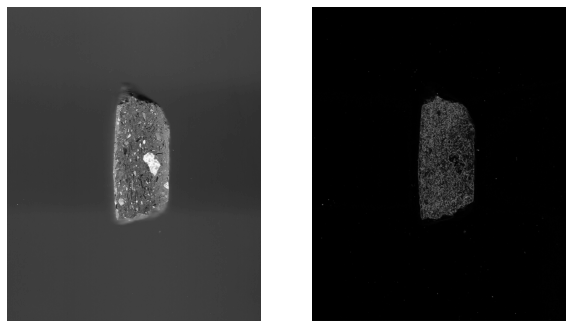

In [164]:
im = rgb2gray(im)
elevation_map = sobel(im)

fig, axes = plt.subplots(ncols =2, figsize = (10,6))

axes[0].imshow(im, cmap = 'gray')
axes[1].imshow(elevation_map, cmap = 'gray')
for ax in axes:
    ax.axis('off')

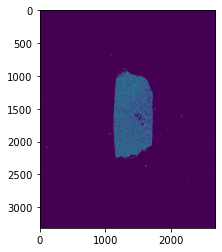

In [165]:
imcan = canny(im)
plt.imshow(imcan)

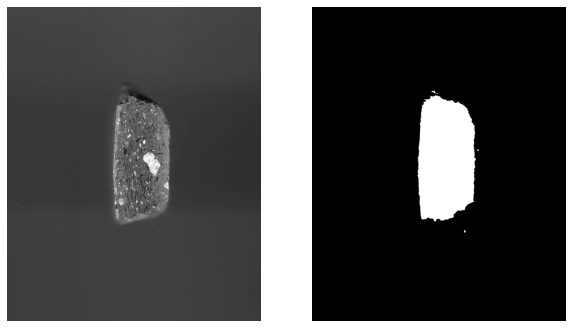

In [166]:
fig, axes = plt.subplots(ncols = 2, figsize = (10,6))
sherd_bi = binary_fill_holes(binary_erosion(binary_dilation(imcan, disk(10)), disk(10)))

axes[0].imshow(im, cmap = 'gray')
axes[1].imshow(remove_small_objects(sherd_bi, 200), cmap= 'gray')
for ax in axes:
    ax.axis('off')

In [167]:
object_labels = label((sherd_bi))
regions = regionprops_table(object_labels, properties = ['area'])
foo = pd.DataFrame(regions)
bar = int(foo.max())
bar

683491

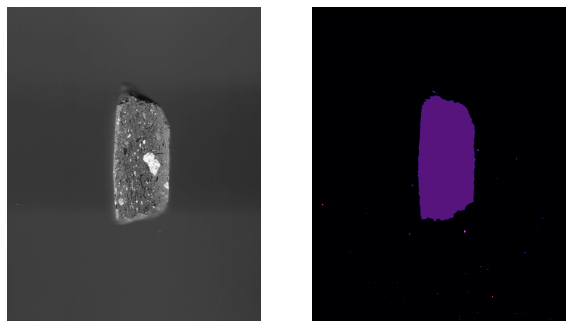

In [168]:
labeled_sherd = label(sherd_bi)
fig, axes = plt.subplots(ncols = 2, figsize = (10,6))
axes[0].imshow(im, cmap = 'gray')
axes[1].imshow(labeled_sherd, cmap = 'magma')
for ax in axes:
  ax.axis('off')

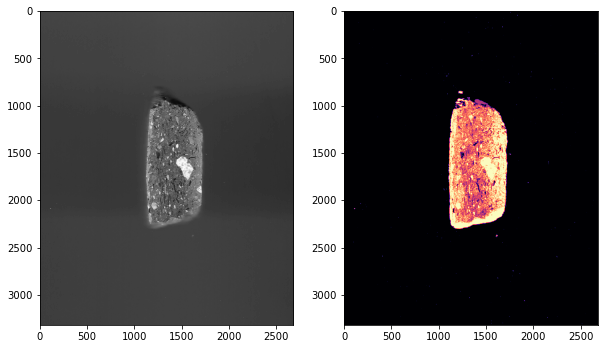

In [169]:
markers = np.zeros_like(im)
markers[im < .08] = 1
markers[im > .3] = 2

fig, axes = plt.subplots(ncols = 2, figsize = (10,6))
axes[0].imshow(im, cmap = 'gray')
axes[1].imshow(markers, cmap = 'magma')

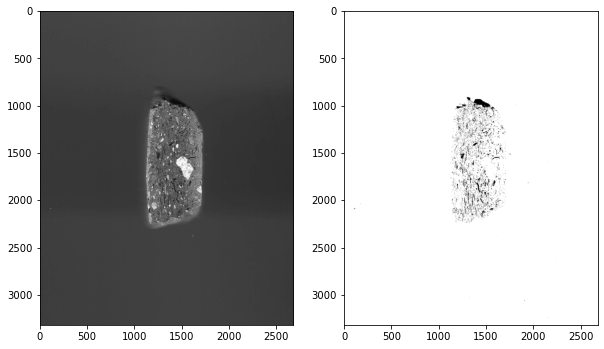

In [170]:
segmentation = watershed(elevation_map, markers= markers)
fig, axes = plt.subplots(ncols = 2, figsize = (10,6))
axes[0].imshow(im, cmap = 'gray')
axes[1].imshow(segmentation, cmap = 'gray')

In [171]:
thresh_val = threshold_otsu(rgb2gray(im))
new_mask = im > thresh_val
object_labels = label(new_mask)
regions = regionprops_table(object_labels, properties = ['area'])
foo = pd.DataFrame(regions)
foo

<ipython-input-171-98fd48e745a3>:1: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  thresh_val = threshold_otsu(rgb2gray(im))


area
0         2
1         3
2         6
3         4
4         2
...     ...
11139     7
11140    12
11141     1
11142     1
11143     2

[11144 rows x 1 columns]

In [172]:
foo.iloc[0][0]

2

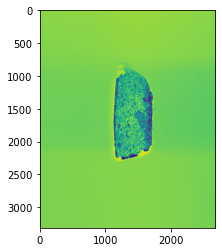

In [173]:
plt.imshow(im-new_mask)

In [174]:

label_img = label(im)
regions = regionprops_table(label_img, properties = ['area'])
pd.DataFrame(regions)

area
0        1
1        1
2        1
3        1
4        1
...    ...
1471     3
1472     3
1473     1
1474     2
1475     1

[1476 rows x 1 columns]

In [175]:

dog_df = pd.DataFrame(data = blobs_dog, columns = ['x location of center', 'y location of center', 'radius (px)'])
dog_df.describe(include='all')

x location of center  y location of center  radius (px)
count            133.000000            133.000000   133.000000
mean            1615.097744           1385.714286    15.686691
std              347.032416            187.996840    12.582337
min              979.000000            111.000000     2.262742
25%             1310.000000           1260.000000     5.792619
50%             1589.000000           1403.000000     9.268190
75%             1930.000000           1513.000000    23.726566
max             2248.000000           1700.000000    37.962506

In [176]:
doh_df = pd.DataFrame(data = blobs_doh, columns = ['x location of center', 'y location of center', 'radius (px)'])
doh_df.describe(include='all')

x location of center  y location of center  radius (px)
count           1073.000000           1073.000000  1073.000000
mean            1554.501398           1365.777260     2.819820
std              392.886038            154.827582     2.025873
min              660.000000            110.000000     1.000000
25%             1209.000000           1264.000000     1.000000
50%             1496.000000           1352.000000     4.222222
75%             1928.000000           1461.000000     4.222222
max             3234.000000           2144.000000    20.333333

In [177]:


selem = disk(2)



##Run a blur on the image first because these scans seem to be too noisy


/Users/aiacobucci922/opt/miniconda3/envs/huehue_alec/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


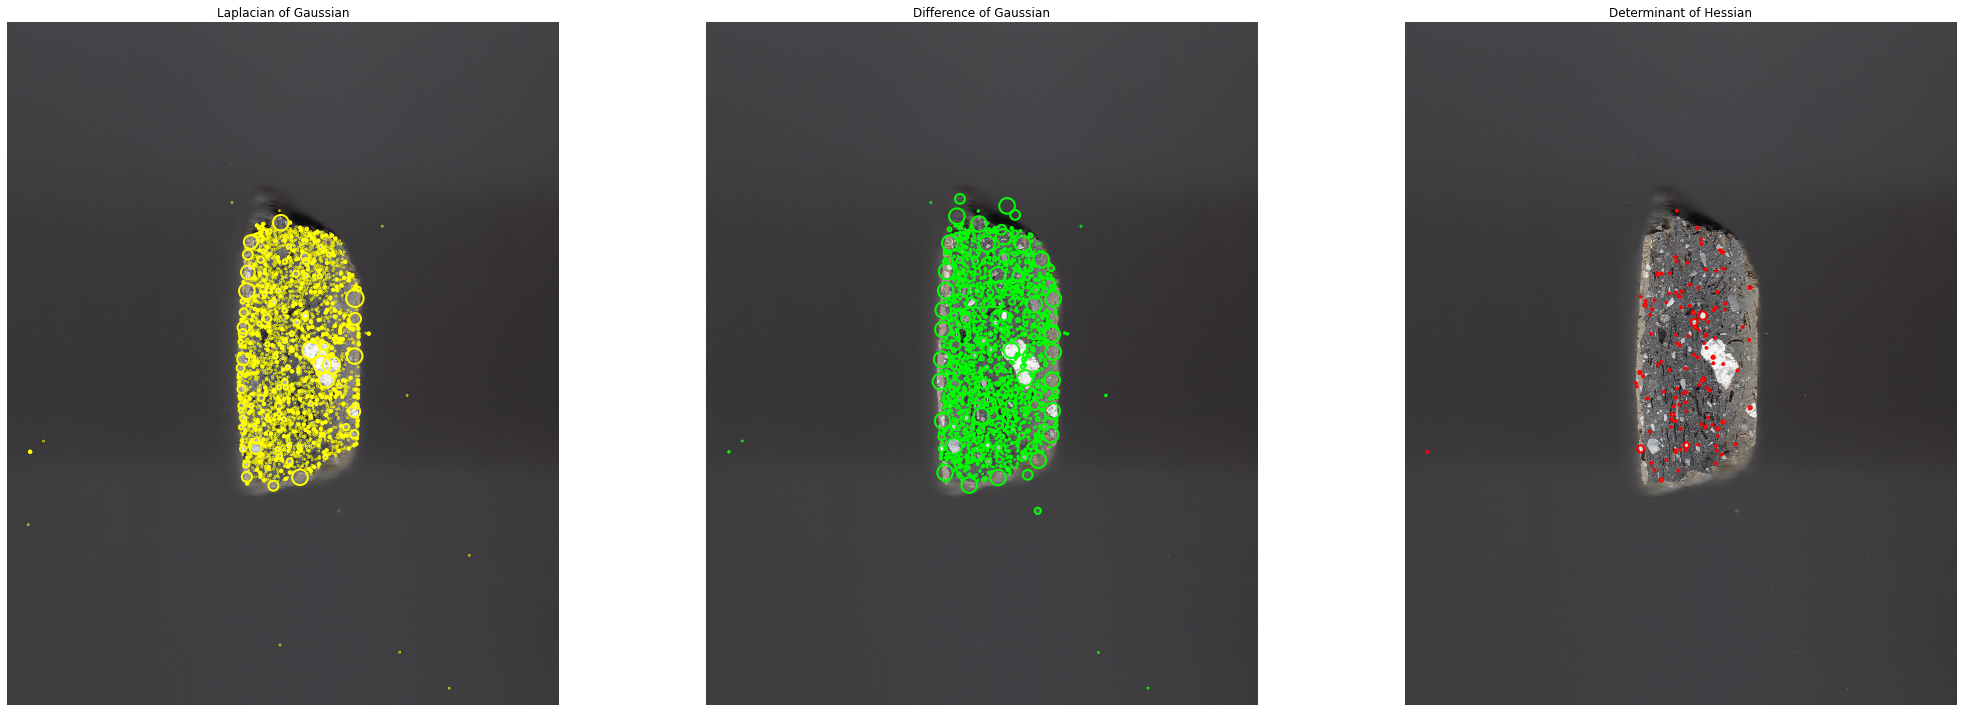

In [178]:
im2 = image
image_gray = rank.mean(rgb2gray(im2), selem = selem)

blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=.1)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.01)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(30, 10), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(im2)
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()

DoH seems to have been over compensated, maybe we should adjust the settings of the blob detector, but DoG and LoG are still finding way too many small boobs where there aren't any. Perhaps adjust counter for a > < of radii? 

In [179]:
#Dominant color detection 
from colorthief import ColorThief

images= []
for path in pathlist:
    image = ColorThief(str(path))
    images.append(image)

color_thief = image[0]

In [180]:
color_thief.get_color()

AttributeError: 'numpy.ndarray' object has no attribute 'get_color'